#  Diabetes using Support Vector Machine

Successfully Imported 
Numpy as np
Pandas as pd
Matplotlib.pyplot as plt
SKlearn as s
Seaborn as sns
************************************

Dataset Loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None
Demo of Dataset
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insuli

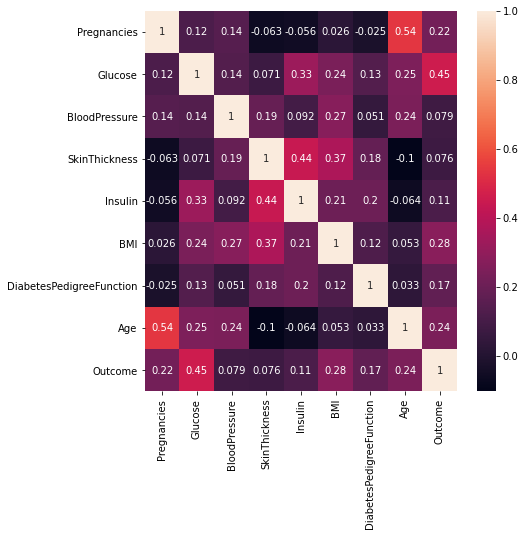


Barplot of missing Data


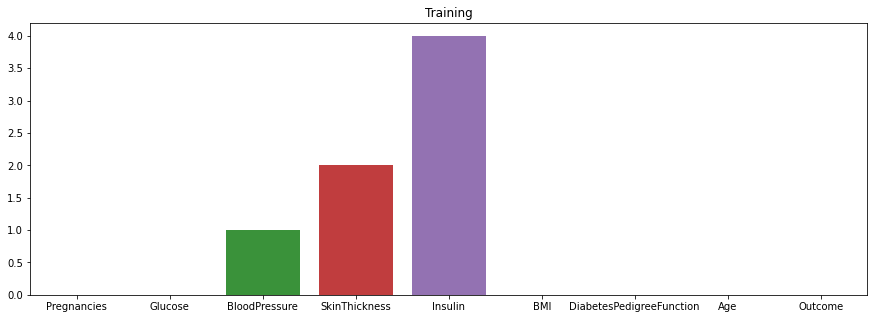

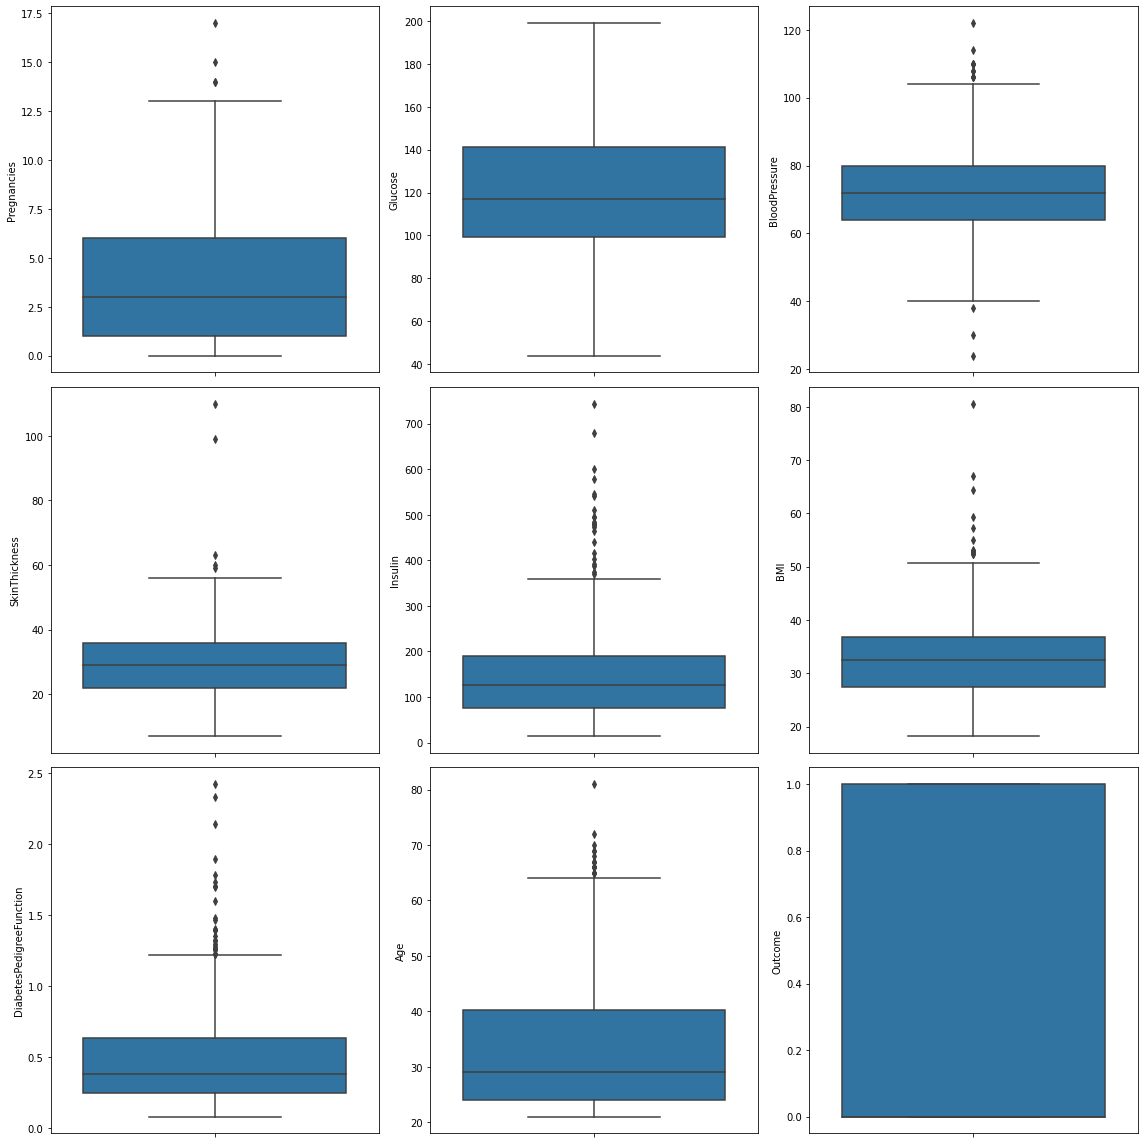

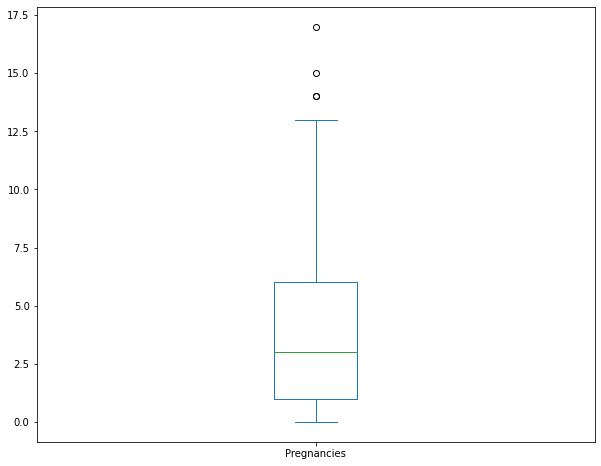

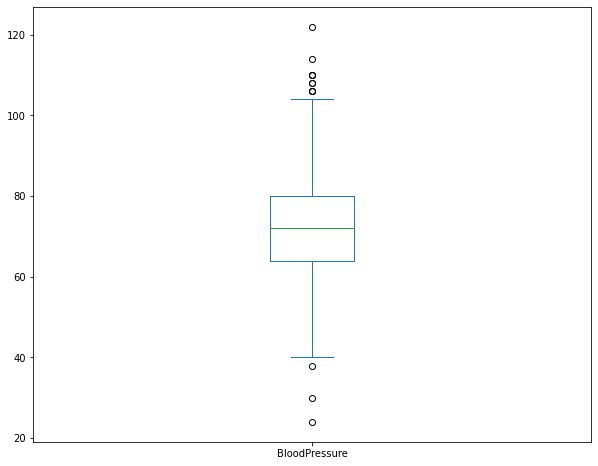

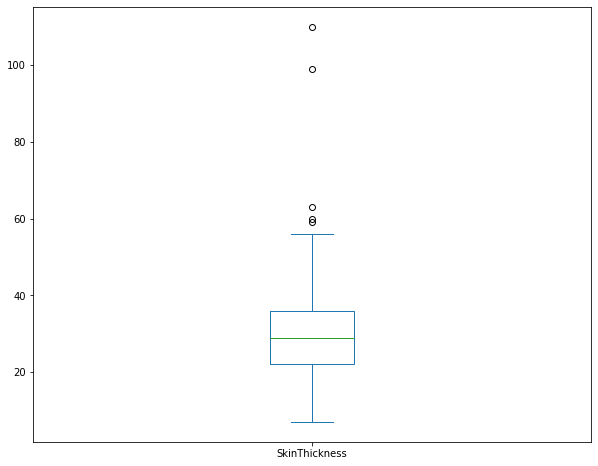

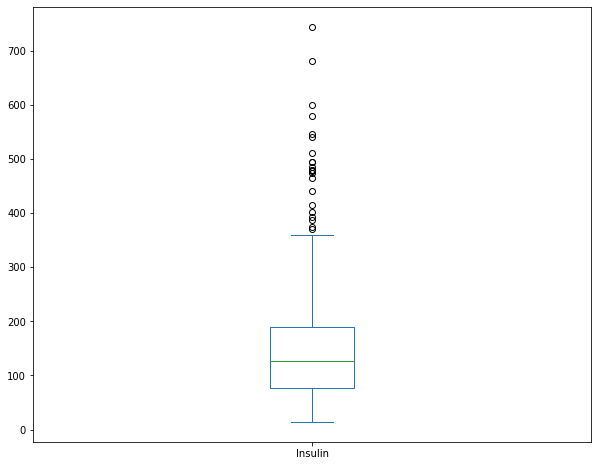

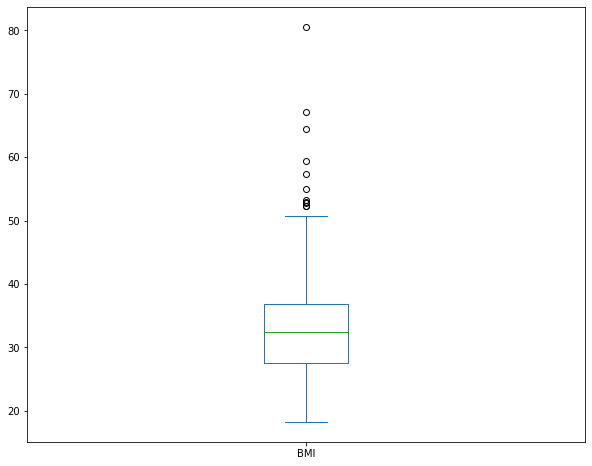

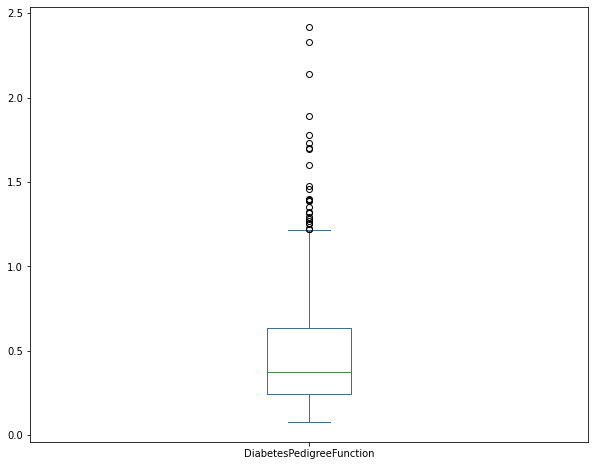

Pregnancies                   4
Glucose                       5
BloodPressure                37
SkinThickness               217
Insulin                     366
BMI                          13
DiabetesPedigreeFunction      3
Age                           0
Outcome                       0
dtype: int64
Dataset after deal with missing values returned as X (input)and Y(Outcome) (without normalization)
Dataset after deal with missing values returned as Norm_X (input) and Norm_Y (Outcome) (with normalization)


In [5]:
%run Data_loader_and_preprocessed.ipynb

In [4]:
# splitting dataset into training and testing part
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
test_data_ratio=[0.3,0.25,0.2,0.15,0.1,0.05]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(Norm_X,Norm_Y,test_size=i,shuffle=True)
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [100,150]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.3
Best score for training data: 0.7557415897061103 

Best C: 100 

Best Kernel: linear 

Best Gamma: scale 

[[131  20]
 [ 35  38]]


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       151
           1       0.66      0.52      0.58        73

    accuracy                           0.75       224
   macro avg       0.72      0.69      0.70       224
weighted avg       0.75      0.75      0.75       224

Training set score for svm_model: 0.773077
Testing  set score for svm_model: 0.754464
******************End of iteration******************

******************Start of iteration******************

For ratio  0.25
Best score for training data: 0.7544802867383513 

Best C: 100 

Best Kernel: linear 

Best Gamma: scale 

[[104  12]
 [ 34  36]]


              precision    recall  f1-score   support

           0       0.75      0.90      0.82       116
           1     